In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [124]:
churn=pd.read_csv("Customer_Churn.csv")

In [125]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
churn = churn.drop(columns=[
    "gender","SeniorCitizen","Partner","Dependents",
    "MultipleLines","InternetService","OnlineSecurity",
    "OnlineBackup","DeviceProtection","TechSupport",
    "StreamingTV","StreamingMovies"
])

In [127]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
churn.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


/tmp/ipython-input-2061449527.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn["tenure"], color="red")


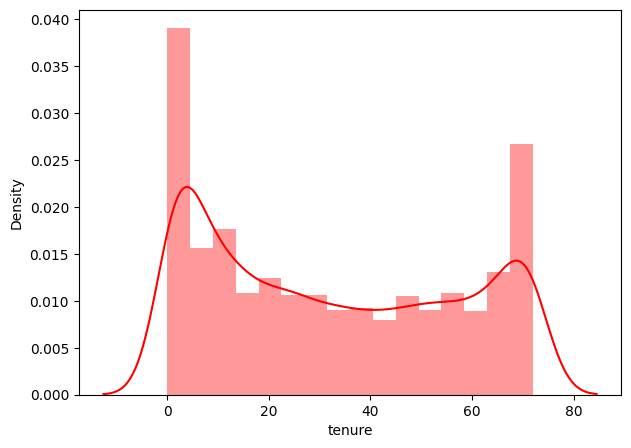

In [129]:
plt.figure(figsize=(7,5))
sns.distplot(churn["tenure"], color="red")
plt.show()

In [130]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
churn["PaperlessBilling"].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [132]:
churn["PaperlessBilling"].value_counts().keys()

Index(['Yes', 'No'], dtype='object', name='PaperlessBilling')

In [133]:
churn["PaperlessBilling"].value_counts().values

array([4171, 2872])

In [134]:
churn.isnull().sum()

,0
customerID,0
tenure,0
PhoneService,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0
Churn,0


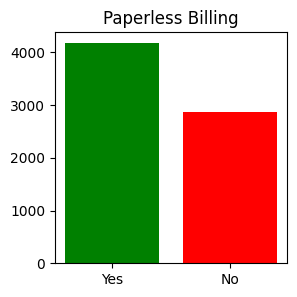

In [135]:
plt.figure(figsize=(3,3))
plt.title("Paperless Billing")
plt.bar(list(churn["PaperlessBilling"].value_counts().keys()),
        list(churn["PaperlessBilling"].value_counts().values), color=["green","red"])
plt.show()

In [136]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
churn["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [138]:
churn["PaymentMethod"].value_counts().keys()

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

In [139]:
churn["PaymentMethod"].value_counts().values

array([2365, 1612, 1544, 1522])

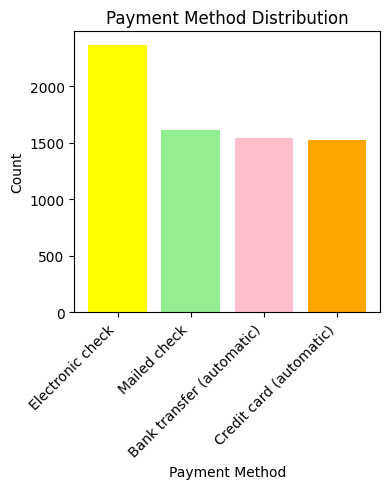

In [140]:
plt.figure(figsize=(4,5))
plt.bar(list(churn["PaymentMethod"].value_counts().keys()),
        list(churn["PaymentMethod"].value_counts().values), color=["yellow","lightgreen","pink","orange"])
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
churn['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [143]:
churn['Contract'].value_counts().keys()

Index(['Month-to-month', 'Two year', 'One year'], dtype='object', name='Contract')

In [144]:
churn['Contract'].value_counts().values

array([3875, 1695, 1473])

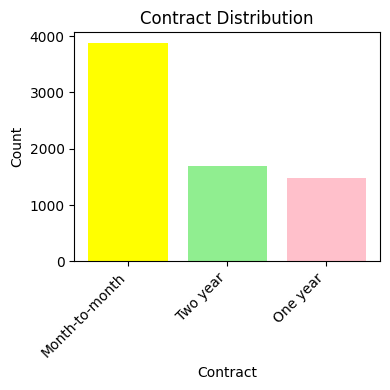

In [145]:
plt.figure(figsize=(4,4))
plt.bar(list(churn['Contract'].value_counts().keys()),
        list(churn['Contract'].value_counts().values), color=["yellow","lightgreen","pink"])
plt.title("Contract Distribution")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [146]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
churn["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


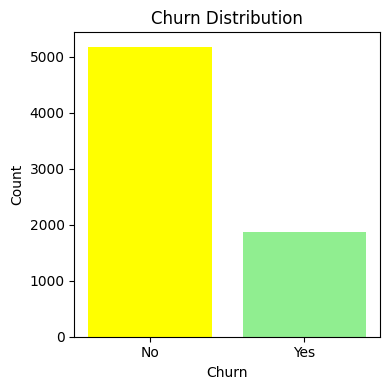

In [148]:
plt.figure(figsize=(4,4))
plt.bar(list(churn["Churn"].value_counts().keys()),
        list(churn["Churn"].value_counts().values), color=["yellow","lightgreen"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [151]:
X = churn[["tenure"]]
y = churn[["Churn"]]

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [154]:
from sklearn.svm import SVC

In [155]:
svc = SVC()

In [156]:
svc.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [159]:
y_pred=svc.predict(x_test)

In [162]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [164]:
confusion_matrix(y_test,y_pred)

array([[1374,  186],
       [ 351,  202]])

In [166]:
accuracy_score(y_test,y_pred)

0.7458589682915286

In [167]:
(1374+202)/(1374+202+351+186)

0.7458589682915286